In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Import all the necessary packages for EDA

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Input data files are available in the read-only "../input/" directory

# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hotel-booking-demand/hotel_bookings.csv


In [2]:
# Load dataset
df = pd.read_csv('/kaggle/input/hotel-booking-demand/hotel_bookings.csv')

## Getting to know your data

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
# There are too many columns. Let's expand the maximum columns can be displayed 
pd.set_option('display.max_columns', None)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## Let's visualize our data!

# Count Plot

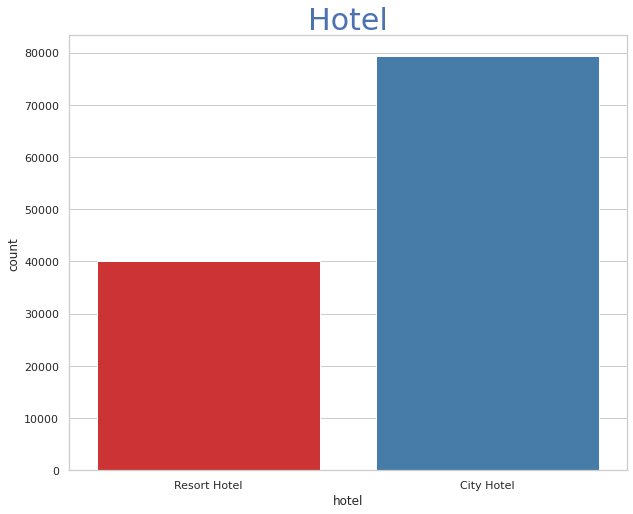

In [7]:
sns.set(style = 'whitegrid')
plt.figure(figsize=(10,8))
ax = sns.countplot(x='hotel',data=df,palette='Set1')
ax.set_title(label='Hotel',size=30,color='b')
plt.show()

About two thirds of the customers booked City Hotel.

# Box Plot

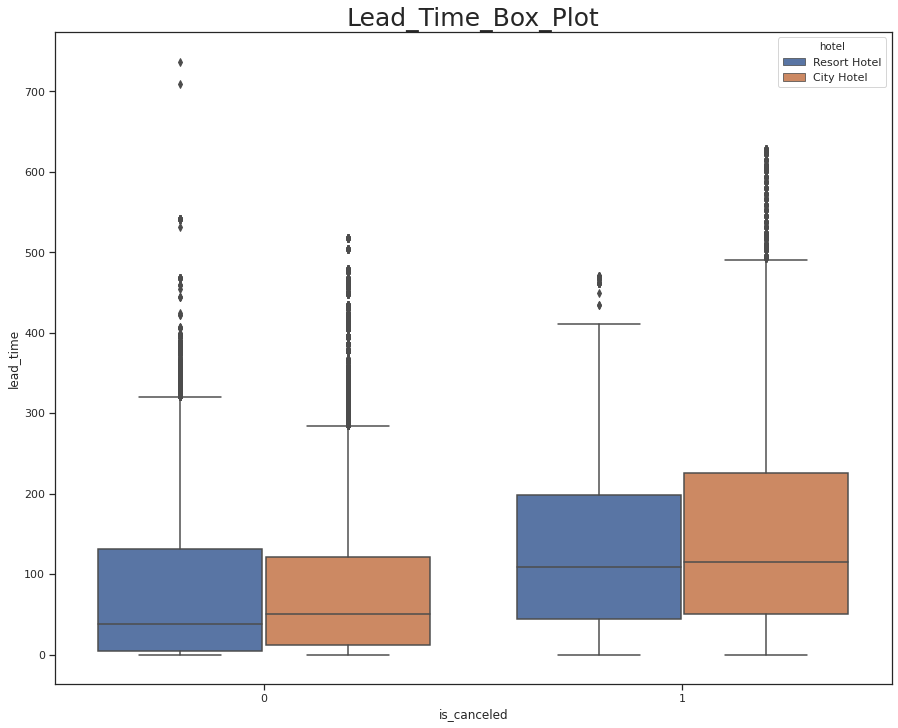

In [8]:
# We can use a histogram to visualize lead_time
sns.set(style='ticks')
plt.figure(figsize=(15,12))
ax = sns.boxplot(x=df['is_canceled'],y=df['lead_time'],hue=df['hotel'])
ax.set_title('Lead_Time_Box_Plot', size=25)
plt.show()

From the bot plot, we can conclude that when lead_time is higher, there is a higher chance that a customer cancel the resevation and it makes sense. When a customer books a hotel 100 days (3 months) ahead, it's very likely for he or she to change the itineary and cancel the reservation. Besides, there is not much difference in average hotel book lead time whether is it cancelled or not between resort and city hotel.

Let's take a look at the arrival date week number. My hypothesis would be there will be more hotel reservations in July, August because it's summer time.

In [9]:
# Sort arrival date week number by count of hotel reservations
print(df['arrival_date_week_number'].nunique())
print(df['arrival_date_week_number'].value_counts().sort_values(ascending=False))  

53
33    3580
30    3087
32    3045
34    3040
18    2926
21    2854
28    2853
17    2805
20    2785
29    2763
42    2756
31    2741
41    2699
15    2689
27    2664
25    2663
38    2661
23    2621
35    2593
39    2581
22    2546
24    2498
13    2416
16    2405
19    2402
40    2397
26    2391
43    2352
44    2272
14    2264
37    2229
8     2216
36    2167
10    2149
9     2117
7     2109
12    2083
11    2070
45    1941
53    1816
49    1782
47    1685
46    1574
6     1508
50    1505
48    1504
4     1487
5     1387
3     1319
2     1218
52    1195
1     1047
51     933
Name: arrival_date_week_number, dtype: int64


# Histogram

Let's use histogram to visualize the distributions of the arrival date week hotel reservations number count.

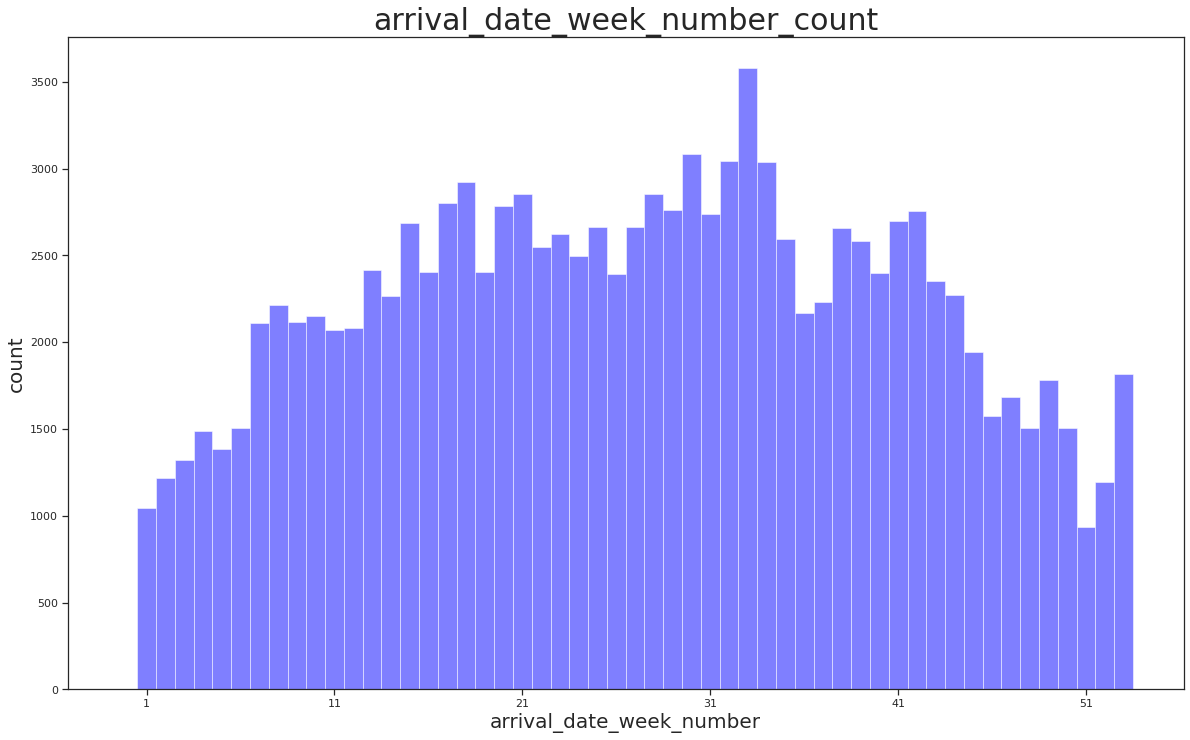

In [10]:
sns.set(style='ticks')
plt.figure(figsize=(20,12))
ax = plt.hist(x=df['arrival_date_week_number'],bins=np.arange(55)-0.5,facecolor='blue',alpha=0.5)
plt.xlabel('arrival_date_week_number',size=20)
plt.ylabel('count',size=20)
plt.title('arrival_date_week_number_count',size=30)
plt.xticks(range(1,54,10))

plt.show()

My hypothesis was right!
<br><br> Indeed,hotel reservation reaches its peak around July and August. 

Let's take a look at previous cancellations. 
<br> If a customer has previous cancelled before, he or she should be more likely to cancel again. 

We take a look at the correlation between 'previous cancellations' and 'is cancelled' first.

In [11]:
df[['is_canceled','previous_cancellations']].corr()

,is_canceled,previous_cancellations
is_canceled,1.000000,0.110133
previous_cancellations,0.110133,1.000000


 Correlation is only 0.1101. Let's check the distribution of previous cancellations.

In [12]:
# Sort previous cancellations by index (cancellation times)
df['previous_cancellations'].value_counts().sort_index()

0     112906
1       6051
2        116
3         65
4         31
5         19
6         22
11        35
13        12
14        14
19        19
21         1
24        48
25        25
26        26
Name: previous_cancellations, dtype: int64

Let's take a look customer cancellation rate for customers who cancelled more than 10 times before!

In [13]:
print('Cancellation rate for customers who have canceled \
more than 10 times before:',str(round(df[df['previous_cancellations']>10]['is_canceled'].mean()*100,2))+'%')


Cancellation rate for customers who have canceled more than 10 times before: 85.56%


85.56%! 
<br>Let's dive in more to see the customer cancellation rate for customers with each previous cancellation times

In [14]:
# Convert index to a list 
a=df['previous_cancellations'].value_counts().index.to_list()
# Sort the list by ascending order
a.sort()
a

[0, 1, 2, 3, 4, 5, 6, 11, 13, 14, 19, 21, 24, 25, 26]

In [15]:
b = []
for ccltime in a:
    b.append(round(df[df['previous_cancellations']==ccltime]['is_canceled'].mean(),2))
b

[0.34,
 0.94,
 0.33,
 0.31,
 0.23,
 0.11,
 0.32,
 0.29,
 0.92,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [16]:

df[df['previous_cancellations']==1]['is_canceled'].value_counts()

1    5714
0     337
Name: is_canceled, dtype: int64

In [17]:
round(df[df['previous_cancellations']==1]['is_canceled'].mean(),2)

0.94

To our surprise, when customer previouslly had one time hotel reservation cancellation, 94% of them cancelled again. Notice, we have a fairly large data for it too. (6,000 data points)
<br><br> Let's dig a little further!

Notice there is a column "previous_bookings_not_canceled" next to the column "previous_cancellations". It's possible that a customer had previously not canceled every reservation he or she made. Thus, by only take account of 0 previous cancellation doesn't give us all embedded information. We define a new variable "previous cancellation rate" as previous cancellations divided by total previous reservations. Let's see if the new features makes more sense in our data.

In [18]:
# Define a new parameter pervious_cancellation_rate
df['previous_cancellation_rate']=df['previous_cancellations']/(df['previous_cancellations']+df['previous_bookings_not_canceled'])

In [19]:
df['previous_cancellation_rate'].value_counts(dropna=False)

NaN         109933
1.000000      5837
0.000000      2973
0.500000        66
0.250000        49
             ...  
0.082192         1
0.069767         1
0.173913         1
0.375000         1
0.086207         1
Name: previous_cancellation_rate, Length: 112, dtype: int64

There are 109933 NaN values for previous_cancellation_rate. It's possibly cause by 0 denominator. Check if that's the case.

In [20]:
(df['previous_cancellations']+df['previous_bookings_not_canceled']).value_counts()

0     109933
1       7125
2        609
3        336
4        235
       ...  
77         1
47         1
76         1
75         1
62         1
Length: 77, dtype: int64

There are 109933 "0: values for denominator. It proves our hypothesis.

Let's divide "previous_cancellation_rate" into 10 equal length intervals and compare their mean of "is_canceled".

In [21]:
df.sort_values('previous_cancellation_rate')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,previous_cancellation_rate
13803,Resort Hotel,0,7,2016,January,3,13,0,2,1,0.0,0,BB,NaN,Corporate,Corporate,0,0,1,A,D,0,No Deposit,94.0,NaN,0,Transient,27.00,0,0,Check-Out,2016-01-15,0.0
31107,Resort Hotel,0,12,2017,March,13,29,0,1,1,0.0,0,BB,PRT,Corporate,Corporate,1,0,1,A,D,0,No Deposit,NaN,355.0,0,Transient,35.00,0,0,Check-Out,2017-03-30,0.0
31110,Resort Hotel,0,0,2017,March,9,1,0,1,1,0.0,0,BB,PRT,Online TA,TA/TO,1,0,1,A,D,0,No Deposit,314.0,NaN,0,Transient,43.20,0,0,Check-Out,2017-03-02,0.0
31120,Resort Hotel,0,12,2017,March,13,29,0,1,1,0.0,0,BB,PRT,Corporate,Corporate,1,0,1,A,D,0,No Deposit,NaN,355.0,0,Transient,35.00,0,0,Check-Out,2017-03-30,0.0
31121,Resort Hotel,0,13,2017,May,19,8,1,0,1,0.0,0,BB,PRT,Corporate,Corporate,1,0,2,A,D,2,No Deposit,NaN,355.0,0,Transient,45.00,0,0,Check-Out,2017-05-09,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,NaN
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,NaN
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,NaN
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,NaN


In [22]:
# Create a list of 10 elements with equal difference from 0 to 1
l = list(range(11))
l = [i/10 for i in l]
# Cut previous cancellation rate into 10 equal length intervals
df['previous_cancellation_rate_interval'] = pd.cut(x=df['previous_cancellation_rate'],bins=l, include_lowest=True)
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,previous_cancellation_rate,previous_cancellation_rate_interval
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,NaN,NaN
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,NaN,NaN
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,NaN,NaN
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,NaN,NaN
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,NaN,NaN
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,NaN,NaN
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,NaN,NaN
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,NaN,NaN


Check value counts

In [23]:
df['previous_cancellation_rate_interval'].value_counts()

(0.9, 1.0]       5849
(-0.001, 0.1]    3153
(0.1, 0.2]        212
(0.2, 0.3]         78
(0.4, 0.5]         71
(0.3, 0.4]         61
(0.6, 0.7]         16
(0.5, 0.6]          9
(0.7, 0.8]          8
(0.8, 0.9]          0
Name: previous_cancellation_rate_interval, dtype: int64

In [24]:
# Find is_canceled mean group by previous cancellation rate interval
df.groupby('previous_cancellation_rate_interval').mean()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,previous_cancellation_rate
previous_cancellation_rate_interval,,,,,,,,,,,,,,,,,,,,,
"(-0.001, 0.1]",0.025373,23.766254,2016.315255,23.842690,15.800507,0.519188,1.603235,1.311767,0.032350,0.002220,0.779892,0.114811,4.217888,0.311449,158.061651,142.956576,0.374881,68.529267,0.221059,0.696480,0.004284
"(0.1, 0.2]",0.117925,20.301887,2016.363208,25.528302,15.669811,0.400943,1.363208,1.132075,0.004717,0.000000,0.839623,1.589623,9.094340,0.292453,92.833333,93.282486,0.000000,57.264623,0.188679,0.938679,0.152828
"(0.2, 0.3]",0.217949,24.500000,2016.230769,27.141026,14.564103,0.294872,1.423077,1.192308,0.000000,0.012821,0.833333,1.974359,6.051282,0.307692,109.166667,75.278689,0.000000,48.920513,0.115385,1.256410,0.250359
"(0.3, 0.4]",0.344262,47.393443,2016.032787,24.377049,14.786885,0.426230,1.229508,1.426230,0.016393,0.000000,0.672131,3.524590,7.245902,0.114754,88.727273,128.763158,4.065574,64.133934,0.049180,0.524590,0.336908
"(0.4, 0.5]",0.492958,37.323944,2016.281690,22.957746,16.140845,0.704225,1.901408,1.323944,0.014085,0.000000,0.718310,1.394366,1.521127,0.323944,194.500000,139.410256,1.309859,74.678592,0.042254,0.577465,0.494672
"(0.5, 0.6]",0.555556,15.444444,2016.222222,23.333333,18.000000,0.444444,2.000000,1.222222,0.000000,0.000000,0.888889,5.000000,4.000000,0.333333,9.000000,279.200000,0.000000,95.133333,0.111111,0.888889,0.578131
"(0.6, 0.7]",0.375000,9.375000,2016.187500,22.625000,15.375000,0.562500,1.375000,1.375000,0.000000,0.000000,1.000000,5.437500,2.625000,0.000000,9.000000,220.111111,0.000000,81.223750,0.000000,0.437500,0.667969
"(0.7, 0.8]",0.000000,2.875000,2016.000000,3.375000,11.750000,0.125000,1.500000,1.375000,0.000000,0.000000,1.000000,10.000000,3.625000,0.000000,8.750000,NaN,0.000000,79.202500,0.000000,0.500000,0.735417
"(0.8, 0.9]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This data makes better sense! Overall, when a customer is in a higher previous cancellaion rate interval, he or she is more inclined to cancel their reservation this time.
<br>We need to also check those customers who have not previous booked a reservation.

In [25]:
df[df['previous_cancellation_rate'].isna()].mean()

is_canceled                          0.347594
lead_time                          100.725542
arrival_date_year                 2016.199694
arrival_date_week_number            26.974985
arrival_date_day_of_month           15.825166
stays_in_weekend_nights              0.951762
stays_in_week_nights                 2.551509
adults                               1.875233
children                             0.111135
babies                               0.008487
is_repeated_guest                    0.005367
previous_cancellations               0.000000
previous_bookings_not_canceled       0.000000
booking_changes                      0.228676
agent                               88.947392
company                            213.224780
days_in_waiting_list                 2.268363
adr                                104.230839
required_car_parking_spaces          0.061001
total_of_special_requests            0.590332
previous_cancellation_rate                NaN
dtype: float64

34.76%!  Without any given previous booking data, a customer has around 34.67% chance to cancel his or her reservation.

We will use a scatter plot to visualize this. Since it's very difficult to deal with "NaN" values in previous cancellation rate, we will keep previous cancellations and previous bookings not canceled for machine learning purpose.
<br> For the scatter plot, we will use the mean of previous cancellation rate in each interval on the X-axis.

# Scatter Plot

In [26]:
# Add a new column mean of previous cancellation rate in each previous cancellation rate interval
df = df.join(df.groupby('previous_cancellation_rate_interval')['previous_cancellation_rate'].mean(),on='previous_cancellation_rate_interval',
             rsuffix='_r').sort_values(by='previous_cancellation_rate_r')
# Add a new column mean of cancellration rate of the last booking in each previous cancellation rate interval
df = df.join(df.groupby('previous_cancellation_rate_interval')['is_canceled'].mean(),on='previous_cancellation_rate_interval',
             rsuffix='_r')

In [27]:
df['previous_cancellation_rate_r'].value_counts()

0.999851    5849
0.004284    3153
0.152828     212
0.250359      78
0.494672      71
0.336908      61
0.667969      16
0.578131       9
0.735417       8
Name: previous_cancellation_rate_r, dtype: int64

In [28]:
# Define X,Y for scatter plot
x = df['previous_cancellation_rate_r']
y = df['is_canceled_r']
u, c = np.unique(np.c_[x,y], return_counts=True, axis=0)

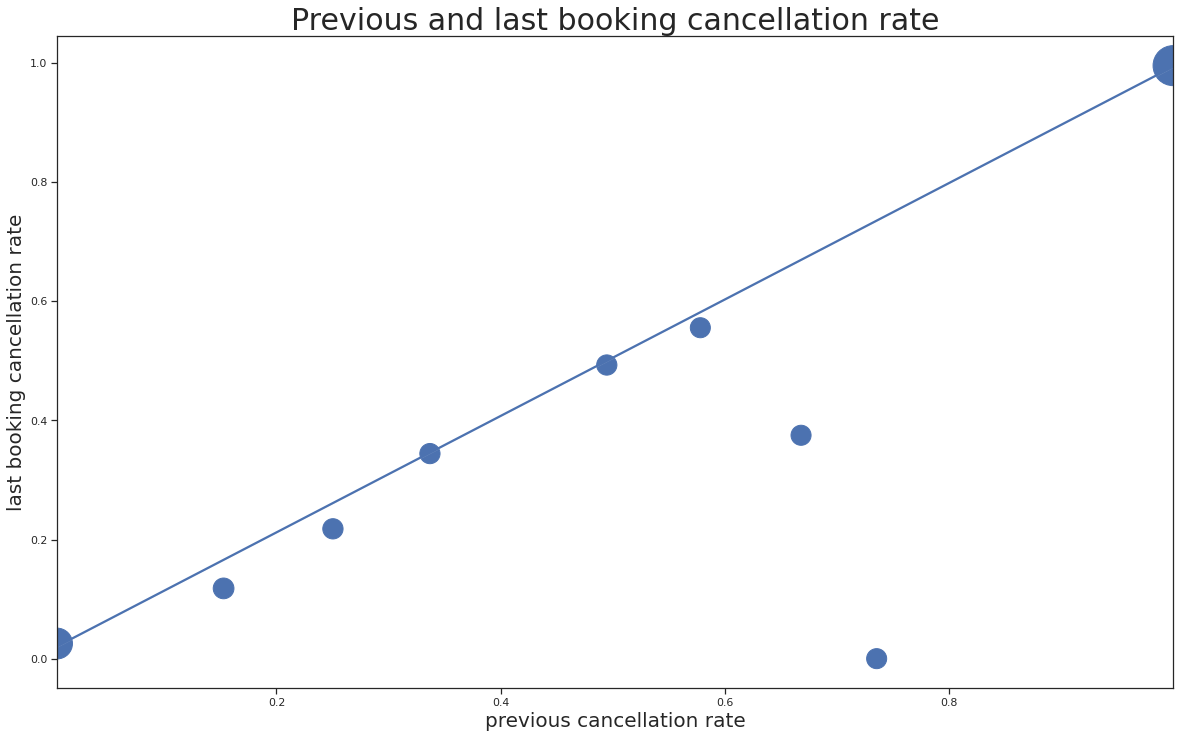

In [29]:
# Normalize
s = lambda x : (((x-x.min())/float(x.max()-x.min())+1)*20)**2
# Scatter Plot
plt.figure(figsize = (20,12))
plt.scatter(u[:,0],u[:,1],s=s(c))
# Add trend line
sns.regplot(x='previous_cancellation_rate_r',y='is_canceled_r',data=df, fit_reg=True) 
plt.xlabel('previous cancellation rate',size=20)
plt.ylabel('last booking cancellation rate',size=20)
plt.title('Previous and last booking cancellation rate',size=30)
plt.show()

From the scatter plot along with trend line, we can confirm previous cancellation rate is a good indication of last cancellation rate. Let's use bar plot to illustrate again.

# Bar Plot

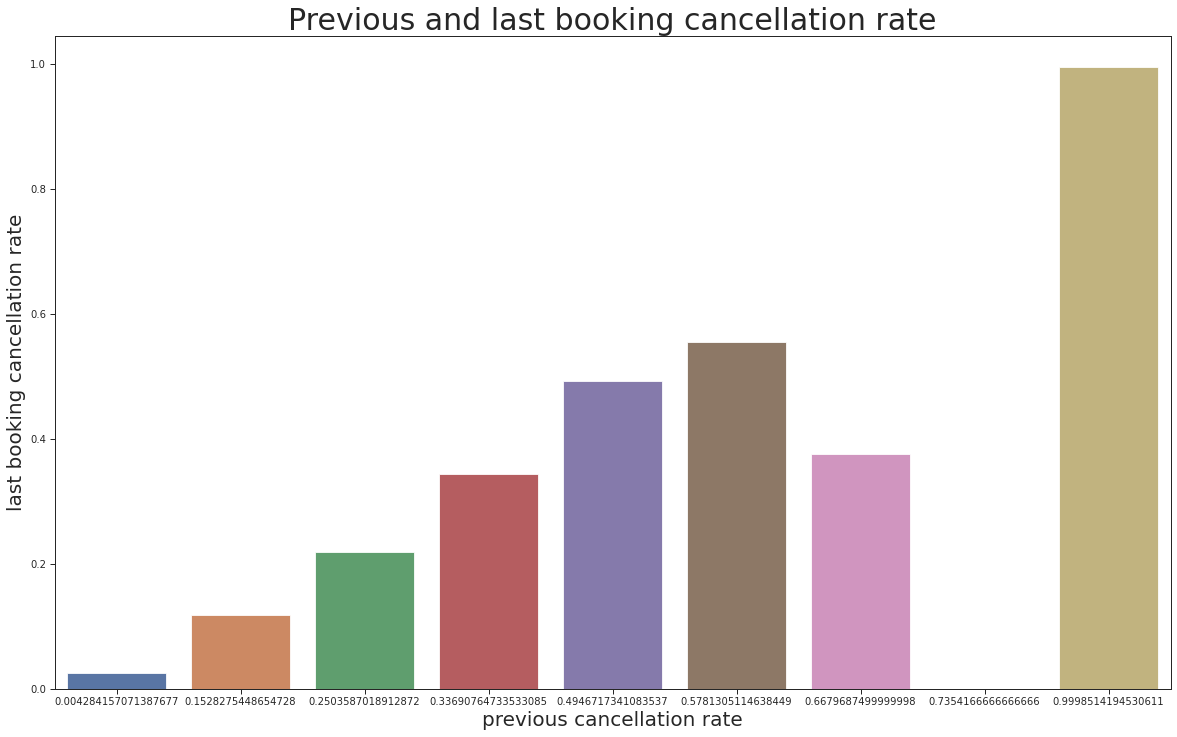

In [30]:
# Bar Plot
sns.set_context('paper')
plt.figure(figsize=(20,12))
sns.barplot(x=df['previous_cancellation_rate_r'],y=df['is_canceled_r'])
plt.xlabel('previous cancellation rate',size=20)
plt.ylabel('last booking cancellation rate',size=20)
plt.title('Previous and last booking cancellation rate',size=30)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Bar plot also shows a clear trend. 

Reserved room type and assigned room type together could also be a good feature to predict whether the last reservation was canceled. For instance, if a customer specifically want one room type, but he or she is assigned another room type. This customer would have a strong tendency to cancel this reservation and try to find a new hotel with his or her ideal room type. Let's explore our data to see whether it makes sense.

In [31]:
df[['is_canceled','reserved_room_type','assigned_room_type']]

,is_canceled,reserved_room_type,assigned_room_type
13803,0,A,D
32382,0,A,A
32407,0,A,D
32408,0,A,D
32409,0,A,D
...,...,...,...
119385,0,A,A
119386,0,E,E
119387,0,D,D
119388,0,A,A


In [32]:
# Define a function to check whether a customer get his or her reserved room type
def rrt_art_same(df):
    if df['reserved_room_type'] == df['assigned_room_type']:
        return 'True'
    else:
        return 'False'

In [33]:
# Apply to dataframe
df['rrt_art_same'] = df.apply(rrt_art_same,axis=1)
# Check dataframe
df[['is_canceled','reserved_room_type','assigned_room_type','rrt_art_same']]

,is_canceled,reserved_room_type,assigned_room_type,rrt_art_same
13803,0,A,D,False
32382,0,A,A,True
32407,0,A,D,False
32408,0,A,D,False
32409,0,A,D,False
...,...,...,...,...
119385,0,A,A,True
119386,0,E,E,True
119387,0,D,D,True
119388,0,A,A,True


In [34]:

df.groupby('rrt_art_same')['is_canceled'].mean()

rrt_art_same
False    0.053764
True     0.415629
Name: is_canceled, dtype: float64

41% and 5%! Indeed, reserved room type together with assigned room type is a good indicator of whether last reservation was canceled. Let's dig a little further and plot a stacked bar graph to visualize it!

In [35]:
df[['reserved_room_type','assigned_room_type']].describe()

,reserved_room_type,assigned_room_type
count,119390,119390
unique,10,12
top,A,A
freq,85994,74053


Let's encode the room type varaible.

In [36]:
#Check room types 
room_type_1 = np.unique(df['reserved_room_type'])
room_type_2 = np.unique(df['assigned_room_type'])
room_type_1, room_type_2 

(array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'L', 'P'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'P'],
       dtype=object))

There are "L" and "K" room types which were not booked but assigned.

In [37]:
gle = LabelEncoder()
genre_labels1 = gle.fit_transform(df['reserved_room_type'])
genre_mappings1 = {index: label for index, label in 
                  enumerate(gle.classes_)}
genre_labels2 = gle.fit_transform(df['assigned_room_type'])
genre_mappings2 = {index: label for index, label in 
                  enumerate(gle.classes_)}
genre_mappings1, genre_mappings2

({0: 'A',
  1: 'B',
  2: 'C',
  3: 'D',
  4: 'E',
  5: 'F',
  6: 'G',
  7: 'H',
  8: 'L',
  9: 'P'},
 {0: 'A',
  1: 'B',
  2: 'C',
  3: 'D',
  4: 'E',
  5: 'F',
  6: 'G',
  7: 'H',
  8: 'I',
  9: 'K',
  10: 'L',
  11: 'P'})

In [38]:
gle = LabelEncoder()
gle.classes_

AttributeError: 'LabelEncoder' object has no attribute 'classes_'

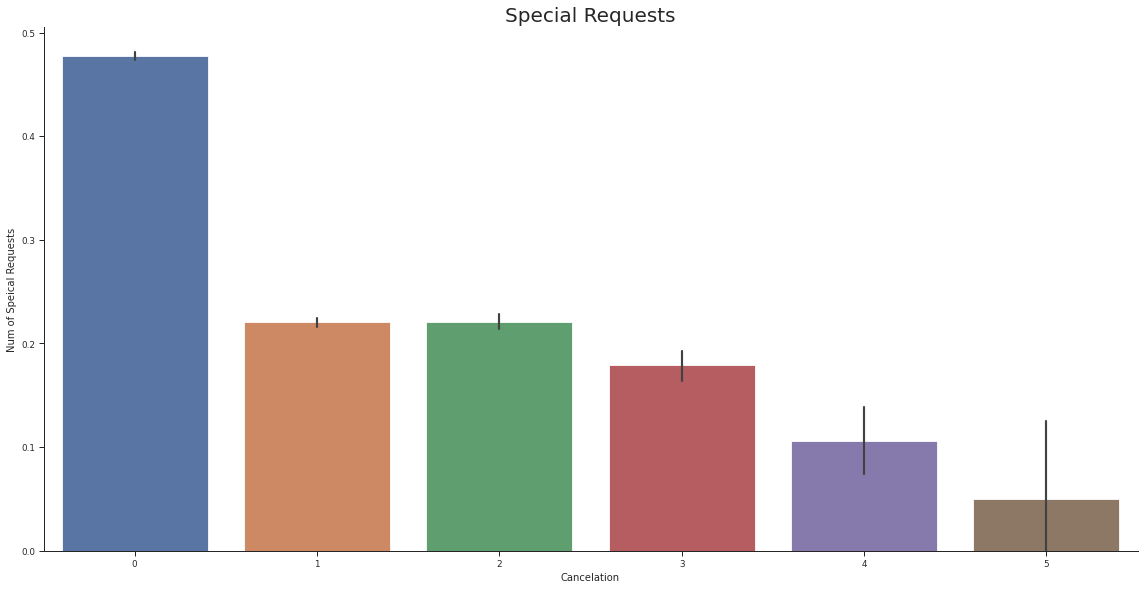

In [39]:
# High negative total of sepcial requests with cancelation. My hypothesis is that when a customer has more special reqeusts and they are met, the customer 
# is more likely to stay with the hotel

sns.catplot(y='is_canceled',x='total_of_special_requests',kind='bar',data=df,height=8,aspect=2)
plt.xlabel('Cancelation',size=10)
plt.ylabel('Num of Speical Requests',size=10)
plt.title('Special Requests',size=20)
plt.show()